In [1]:
from scipy.io import loadmat
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_file = loadmat('/content/Data/Amazon.mat')
labels = data_file['label'].flatten()
feat_data = data_file['features'].todense().A



In [4]:
# The first 3304 nodes are not labeled
count_labels = Counter(labels[3305:])
percentages = {k: v/len(labels[3305:]) for k, v in count_labels.items()}
print("Proportion of each class in the labeled data:")
print(f"\tClass 0: {percentages[0]:.2%}")
print(f"\tClass 1: {percentages[1]:.2%}")
print("Number of labeled nodes:", len(labels[3305:]))
print("Total number of nodes:", len(labels))
print("Number of features:", feat_data.shape[1])

Proportion of each class in the labeled data:
	Class 0: 90.50%
	Class 1: 9.50%
Number of labeled nodes: 8639
Total number of nodes: 11944
Number of features: 25


In [5]:
print('Number of nodes:', len(labels))

Number of nodes: 11944


In [6]:
with open('Data/amz_homo_adjlists.pickle', 'rb') as file:
    homo = pickle.load(file)
file.close()

In [7]:
list_edges = []
for i in range(len(labels)):
    list_edges.append(len(homo[i]))

print(f"Average number of edges per node: {np.mean(list_edges):.4}")
print(f"Median number of edges per node: {np.median(list_edges)}")

Average number of edges per node: 737.5
Median number of edges per node: 400.0


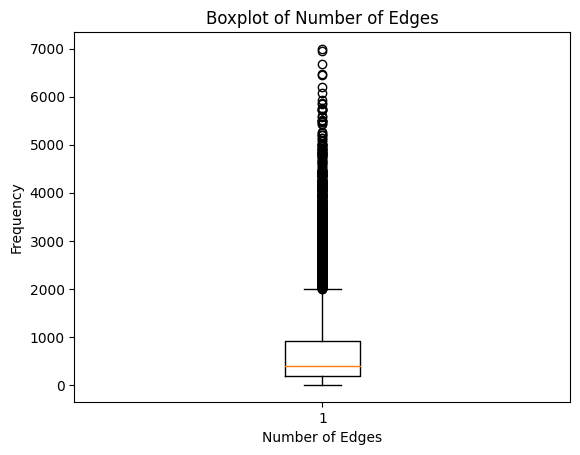

In [8]:
plt.boxplot(list_edges)
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')
plt.title('Boxplot of Number of Edges')
plt.show()


In [9]:
# Random forest model on node features for amazon graph
y_model, data_model = labels[3305:], feat_data[3305:, :]

X_train, X_test, y_train, y_test = train_test_split(data_model, y_model, test_size=0.2, random_state=42, stratify=y_model)


model = RandomForestClassifier(n_estimators=150,class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1564
         1.0       0.92      0.84      0.88       164

    accuracy                           0.98      1728
   macro avg       0.95      0.92      0.93      1728
weighted avg       0.98      0.98      0.98      1728



In [10]:
!pip install pycaret

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *

# Assuming 'feat_data' and 'labels' are defined as per your context
# Combine features and labels into a single DataFrame
data = pd.DataFrame(feat_data[3305:, :], columns=[f'feature_{i}' for i in range(feat_data.shape[1])])
data['target'] = labels[3305:]

# Splitting the data into training and testing dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])

# Setup PyCaret - target column is 'target'
clf1 = setup(data=train_data, target='target', session_id=42, use_gpu=True)

# Compare models
best_model = compare_models()

# Optionally, you can also evaluate the models on the test dataset
predict_model(best_model, data=test_data)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(6911, 26)"
4,Transformed data shape,"(6911, 26)"
5,Transformed train set shape,"(4837, 26)"
6,Transformed test set shape,"(2074, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9758,0.9837,0.8217,0.9155,0.8652,0.8520,0.8540,0.9810
knn,K Neighbors Classifier,0.9750,0.9058,0.7696,0.9596,0.8529,0.8395,0.8462,0.2240
ada,Ada Boost Classifier,0.9748,0.9808,0.8152,0.9108,0.8591,0.8453,0.8476,0.4680
lr,Logistic Regression,0.9740,0.9701,0.7739,0.9415,0.8488,0.8348,0.8399,2.4130
rf,Random Forest Classifier,0.9735,0.9753,0.7891,0.9241,0.8490,0.8347,0.8391,1.5020
xgboost,Extreme Gradient Boosting,0.9735,0.9806,0.8152,0.8981,0.8534,0.8389,0.8408,0.2350
lightgbm,Light Gradient Boosting Machine,0.9733,0.9828,0.8065,0.9041,0.8505,0.8360,0.8388,0.4810
et,Extra Trees Classifier,0.9696,0.9649,0.7848,0.8859,0.8303,0.8137,0.8167,0.4370
dt,Decision Tree Classifier,0.9634,0.9029,0.8283,0.7959,0.8106,0.7904,0.7913,0.3260
lda,Linear Discriminant Analysis,0.9597,0.9593,0.6543,0.8938,0.7544,0.7331,0.7443,0.1930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9815,0.9805,0.8720,0.9286,0.8994,0.8892,0.8897


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,target,prediction_label,prediction_score
1391,1.0,38.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,...,4.000000,2.0,0.0,0.000000,1.0,53.000000,1.0,0.0,0,0.9984
5799,1.0,12.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,...,5.000000,1.0,0.0,0.000000,1.0,32.000000,1.0,0.0,0,0.9985
4895,7.0,15.0,0.0,0.0,0.0,0.0,7.0,0.000000,0.0,0.0,...,5.000000,0.0,749.0,0.955700,0.0,28.428572,1.0,0.0,0,0.9960
4230,1.0,9.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,...,4.000000,3.0,0.0,0.000000,1.0,17.000000,1.0,0.0,0,0.9984
6771,1.0,11.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,...,5.000000,1.0,0.0,0.000000,1.0,18.000000,1.0,0.0,0,0.9984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7697,2.0,10.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,...,4.500000,0.0,0.0,0.000000,1.0,20.000000,1.0,0.0,0,0.9928
7997,1.0,7.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,...,1.000000,3.0,0.0,0.000000,1.0,18.000000,-1.0,0.0,0,0.9921
1849,7.0,8.0,2.0,0.0,0.0,0.0,5.0,0.285714,0.0,0.0,...,3.857143,0.0,1839.0,1.549826,0.0,33.571430,1.0,0.0,0,0.9890
4917,3.0,12.0,0.0,0.0,0.0,3.0,0.0,0.000000,0.0,0.0,...,4.000000,0.0,2322.0,1.098612,0.0,52.666668,1.0,0.0,0,0.9967


from matplotlib import pyplot as plt
_df_0['feature_0'].plot(kind='hist', bins=20, title='feature_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['feature_1'].plot(kind='hist', bins=20, title='feature_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['feature_2'].plot(kind='hist', bins=20, title='feature_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['feature_3'].plot(kind='hist', bins=20, title='feature_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='feature_0', y='feature_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='feature_1', y='feature_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='feature_2', y='feature_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='feature_3', y='feature_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['feature_0'].plot(kind='line', figsize=(8, 4), title='feature_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['feature_1'].plot(kind='line', figsize=(8, 4), title='feature_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['feature_2'].plot(kind='line', figsize=(8, 4), title='feature_2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['feature_3'].plot(kind='line', figsize=(8, 4), title='feature_3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import classification_report

# Assuming 'feat_data' and 'labels' are defined as per your context
# Combine features and labels into a single DataFrame
data = pd.DataFrame(feat_data[3305:, :], columns=[f'feature_{i}' for i in range(feat_data.shape[1])])
data['target'] = labels[3305:]

# Splitting the data into training and testing dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])

# Setup PyCaret - target column is 'target'
clf1 = setup(data=train_data, target='target', session_id=42, use_gpu=True)

# Compare models
best_model = compare_models()

# Create a model based on the best model found by compare_models
final_best_model = finalize_model(best_model)

# Predict on the test set
predictions = predict_model(final_best_model, data=test_data)

# Extract the true labels and predicted labels from the predictions DataFrame
true_labels = predictions['target']
predicted_labels = predictions['prediction_label']

# Generate a classification report
report = classification_report(true_labels, predicted_labels)
print(report)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(6911, 26)"
4,Transformed data shape,"(6911, 26)"
5,Transformed train set shape,"(4837, 26)"
6,Transformed test set shape,"(2074, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9758,0.9837,0.8217,0.9155,0.8652,0.8520,0.8540,1.4090
knn,K Neighbors Classifier,0.9750,0.9058,0.7696,0.9596,0.8529,0.8395,0.8462,0.3670
ada,Ada Boost Classifier,0.9748,0.9808,0.8152,0.9108,0.8591,0.8453,0.8476,0.3590
lr,Logistic Regression,0.9740,0.9701,0.7739,0.9415,0.8488,0.8348,0.8399,1.9180
rf,Random Forest Classifier,0.9735,0.9753,0.7891,0.9241,0.8490,0.8347,0.8391,1.1590
xgboost,Extreme Gradient Boosting,0.9735,0.9806,0.8152,0.8981,0.8534,0.8389,0.8408,0.6650
lightgbm,Light Gradient Boosting Machine,0.9733,0.9828,0.8065,0.9041,0.8505,0.8360,0.8388,0.8300
et,Extra Trees Classifier,0.9696,0.9649,0.7848,0.8859,0.8303,0.8137,0.8167,0.7710
dt,Decision Tree Classifier,0.9634,0.9029,0.8283,0.7959,0.8106,0.7904,0.7913,0.1540
lda,Linear Discriminant Analysis,0.9597,0.9593,0.6543,0.8938,0.7544,0.7331,0.7443,0.1500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9809,0.9809,0.8720,0.9226,0.8966,0.8860,0.8865


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1564
         1.0       0.92      0.87      0.90       164

    accuracy                           0.98      1728
   macro avg       0.95      0.93      0.94      1728
weighted avg       0.98      0.98      0.98      1728



Visualize the TSNE for the amazon dataset

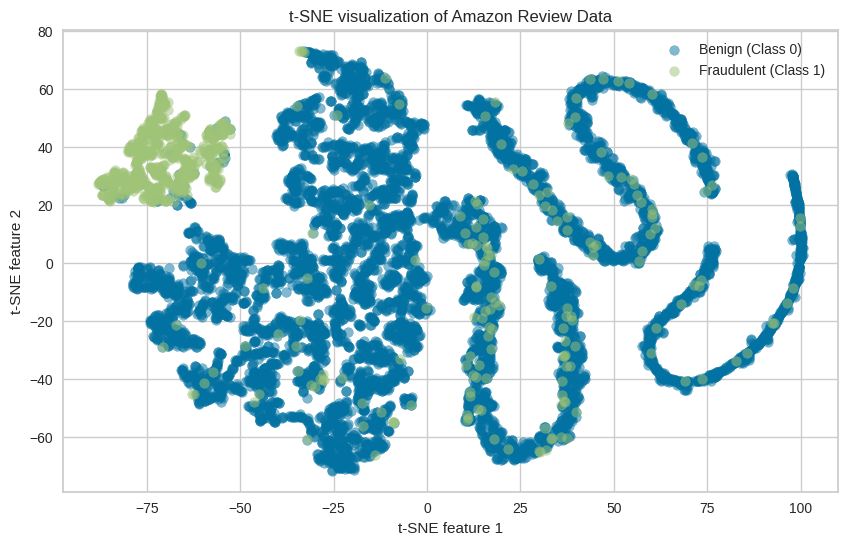

In [13]:
from scipy.io import loadmat
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

data_file = loadmat('/content/Data/Amazon.mat')
labels = data_file['label'].flatten()
feat_data = data_file['features'].todense().A

# Your existing code

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(feat_data[3305:])  # Assuming the first 3304 are unlabeled and hence excluded

# Separating the reduced features by their labels for plotting
X_tsne_benign = X_tsne[labels[3305:] == 0]
X_tsne_fraudulent = X_tsne[labels[3305:] == 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne_benign[:, 0], X_tsne_benign[:, 1], label='Benign (Class 0)', alpha=0.5)
plt.scatter(X_tsne_fraudulent[:, 0], X_tsne_fraudulent[:, 1], label='Fraudulent (Class 1)', alpha=0.5)
plt.title('t-SNE visualization of Amazon Review Data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()
